+
You're ready to put into practice everything you've learned so far.

DONE
First: Go out and find a dataset of interest. It could be from one of our recommended resources, some other aggregation, or scraped yourself. Just make sure it has lots of variables in it, including an outcome of interest to you.

DONE  
Second: Explore the data. Get to know the data. Spend a lot of time going over its quirks and peccadilloes. You should understand how it was gathered, what's in it, and what the variables look like.

DONE
Third: Model your outcome of interest. You should try several different approaches and really work to tune a variety of models before using the model evaluation techniques to choose what you consider to be the best performer. Make sure to think about explanatory versus predictive power and experiment with both.

So, here is the deliverable: Prepare a slide deck and 15 minute presentation that guides viewers through your model. Be sure to cover a few specific things:

A specified research question your model addresses
How you chose your model specification and what alternatives you compared it to
The practical uses of your model for an audience of interest
Any weak points or shortcomings of your model
This presentation is not a drill. You'll be presenting this slide deck live to a group as the culmination of your work in the last two supervised learning units. As a secondary matter, your slides and / or the Jupyter notebook you use or adapt them into should be worthy of inclusion as examples of your work product when applying to jobs.

to-do list

1) load data                        DONE

2) clean dataset                 unnecessary columns are dropped, NaN values are dropped,

3) feature engineering:          
                                 each columns are independent. if inter-dependent, drop the additional one
                                 each column values are converted to numeric
                                 new columns are added if needed
                                 
                                 
                                 
4) models:                       decision tree
                                 random forest
                                 SVC
                                 


## Loan Default Prediction:  modelling based upon consumer data

## Introduction

    The aftermath of the 2008 subprime mortgage crisis has caused huge damages to world economy and society. It raises importance of retail credit for consumers. Using Data Science, Data Mining, Exploratory Data Analysis and Machine Learning, we will investigate the issue in detail and try to predict if an individual is likely to default on a loan or not. 

[Google Slides Presentation Link](https://docs.google.com/presentation/d/1RwfTxwPwXFyIjojebhE7_kOv41Tkx4n1wpRNcHcjkw8/edit#slide=id.g723630543_3_0)



## Research Questions

    Based upon data, can the model predict whether one loan will default or not?
    
  

## Models

    Three models will be used, Decision Tree, Random Forest & Boosting Classifier.

In [1]:
import numpy as np
import pandas as pd
import scipy
import math
from decimal import Decimal
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.feature_selection import VarianceThreshold

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# decision tree
from sklearn import tree
# A convenience for displaying visualizations.
from IPython.display import Image
# Packages for rendering our tree.
import pydotplus
#import graphviz

# linear regression model
from sklearn import linear_model

# SVC
from sklearn import ensemble
from sklearn.svm import SVC

## Setup utility functions 

In [2]:
# convert alphabetic grades to numerical ones
#      A    B    C    D    E    F    G
#      1    2    3    4    5    6    7
def grade_from_alphabet_to_numeric(x):
    grade_map = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7}
    try:
        return grade_map[str(x)]
    except KeyError:
        return Decimal('nan')

In [3]:
# convert string emp_length to numerical ones
#  
def convert_emp_length_to_numeric(x):
    x_tmp = str(x).split(' ')[:-1]
    x_new = str(x_tmp[0])
    if len(x_tmp) > 1:
        x_new = x_new + ' ' + x_tmp[1]
    
    conv_map = {'<1':1, '1':2, '2':3, '3':4, '4':5, '5':6, '6':7, '7':8, '8':9, '9':10, '10':11, '10+':12}
    try:
        return conv_map[str(x_new)]
    except:
        return Decimal('nan')

In [4]:
# convert string home_ownership to numerical ones
#       'OWN', 'MORTGAGE', 'RENT', 'OTHER', 'NONE'
#        1      2           3      4        5
def convert_home_ownership_to_numeric(x):
    conv_map = {'OWN':1, 'MORTGAGE':2, 'RENT':3, 'OTHER':4, 'NONE':5}
    try:
        return conv_map[str(x)]
    except:
        return Decimal('nan')

In [5]:
# convert string verification to numerical numbers
#               'Source Verified'   'Verified'   'nOT Verified'
#               1                   2           3
def convert_verification_to_numeric(x):
    conv_map = {'Source Verified':1, 'Verified':2, 'Not Verified':3}
    try:
        return conv_map[str(x)]
    except:
        return Decimal('nan')

In [6]:
# split dataset into train & test
def train_test_dataset(x, size, ran):
    x_train, x_test = train_test_split(x, test_size=size, random_state=ran)
    return x_train, x_test

## readin dataset

In [7]:
df_0 = pd.read_csv('../../data-201-resources-master/LendingClub/LoanStats3a_new.csv')
df_0.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3018: DtypeWarning: Columns (16,120,122) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Unnamed: 0.1,acc_now_delinq,acc_open_past_24mths,addr_state,all_util,annual_inc,annual_inc_joint,application_type,avg_cur_bal,...,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,url,verification_status,verification_status_joint,zip_code
0,0,NaN,0,NaN,AZ,NaN,24000.0,NaN,Individual,NaN,...,5863.155187,5833.84,863.16,0.00,5000.00,NaN,NaN,Verified,NaN,860xx
1,1,NaN,0,NaN,GA,NaN,30000.0,NaN,Individual,NaN,...,1014.530000,1014.53,435.17,0.00,456.46,NaN,NaN,Source Verified,NaN,309xx
2,2,NaN,0,NaN,IL,NaN,12252.0,NaN,Individual,NaN,...,3005.666844,3005.67,605.67,0.00,2400.00,NaN,NaN,Not Verified,NaN,606xx
3,3,NaN,0,NaN,CA,NaN,49200.0,NaN,Individual,NaN,...,12231.890000,12231.89,2214.92,16.97,10000.00,NaN,NaN,Source Verified,NaN,917xx
4,4,NaN,0,NaN,OR,NaN,80000.0,NaN,Individual,NaN,...,4066.908161,4066.91,1066.91,0.00,3000.00,NaN,NaN,Source Verified,NaN,972xx


## dataset imbalance

    The dataset above has 86% data for class 0 and 14% for class 1. To mitigate dataset imbalance, additional data
    are added.


In [9]:
df_1 = pd.read_csv('../../data-201-resources-master/LendingClub/LoanStats3e.csv')
df_2 = pd.read_csv('../../data-201-resources-master/LendingClub/LoanStats3f.csv')
df = pd.DataFrame()
df = df_0
df = df.append(df_1, axis=1)
df = df.append(df_2, axis=2)

## Cleaning dataset:    
            (1) drop unnecessary columns    
            (2) drop NaN values
            (3) convert remaining columns to numeric for models

In [10]:
# Below are the columns important for this analysis
X = pd.DataFrame()
X['loan_amnt'] = df['loan_amnt']
X['funded_amnt_inv'] = df['funded_amnt_inv']
X['term'] = df['term']
X['int_rate'] = df['int_rate']
X['installment'] = df['installment']
X['grade'] = df['grade']
X['sub_grade'] = df['sub_grade']
X['emp_length'] = df['emp_length']
X['home_ownership'] = df['home_ownership']
X['annual_inc'] = df['annual_inc']
X['verification_status'] = df['verification_status']
#X['purpose'] = df['purpose']
X['inq_last_6mths'] = df['inq_last_6mths']
X['loan_status'] = df['loan_status']

X = X.dropna()
# reset index
X.reset_index(drop=True, inplace=True)

In [11]:
# convert column value to numeric
# strip off 'months'
X['term'] = X['term'].apply(lambda x: int(str(x)[:-7]))
# strip off '%'
X['int_rate'] = X['int_rate'].apply(lambda x: float(str(x)[:-1]))
X['grade'] = X['grade'].apply(lambda x: grade_from_alphabet_to_numeric(x))
# strip grade alphabet from subgrade
X['sub_grade'] = X['sub_grade'].apply(lambda x: int(str(x)[1:]))
X['emp_length'] = X['emp_length'].apply(lambda x: convert_emp_length_to_numeric(x))
X['home_ownership'] = X['home_ownership'].apply(lambda x: convert_home_ownership_to_numeric(x))
X['verification_status'] = df['verification_status'].apply(lambda x: convert_verification_to_numeric(x))
X['loan_status'] = X['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

## Performing Features' Selection

In [12]:
# if any feature has too small variance
selection = VarianceThreshold(threshold=(0.9*(1-0.9)))
X_tmp = selection.fit_transform(X)
print(X.shape)
print(X_tmp.shape)

(71348, 13)
(71348, 13)


##   visualizing data

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


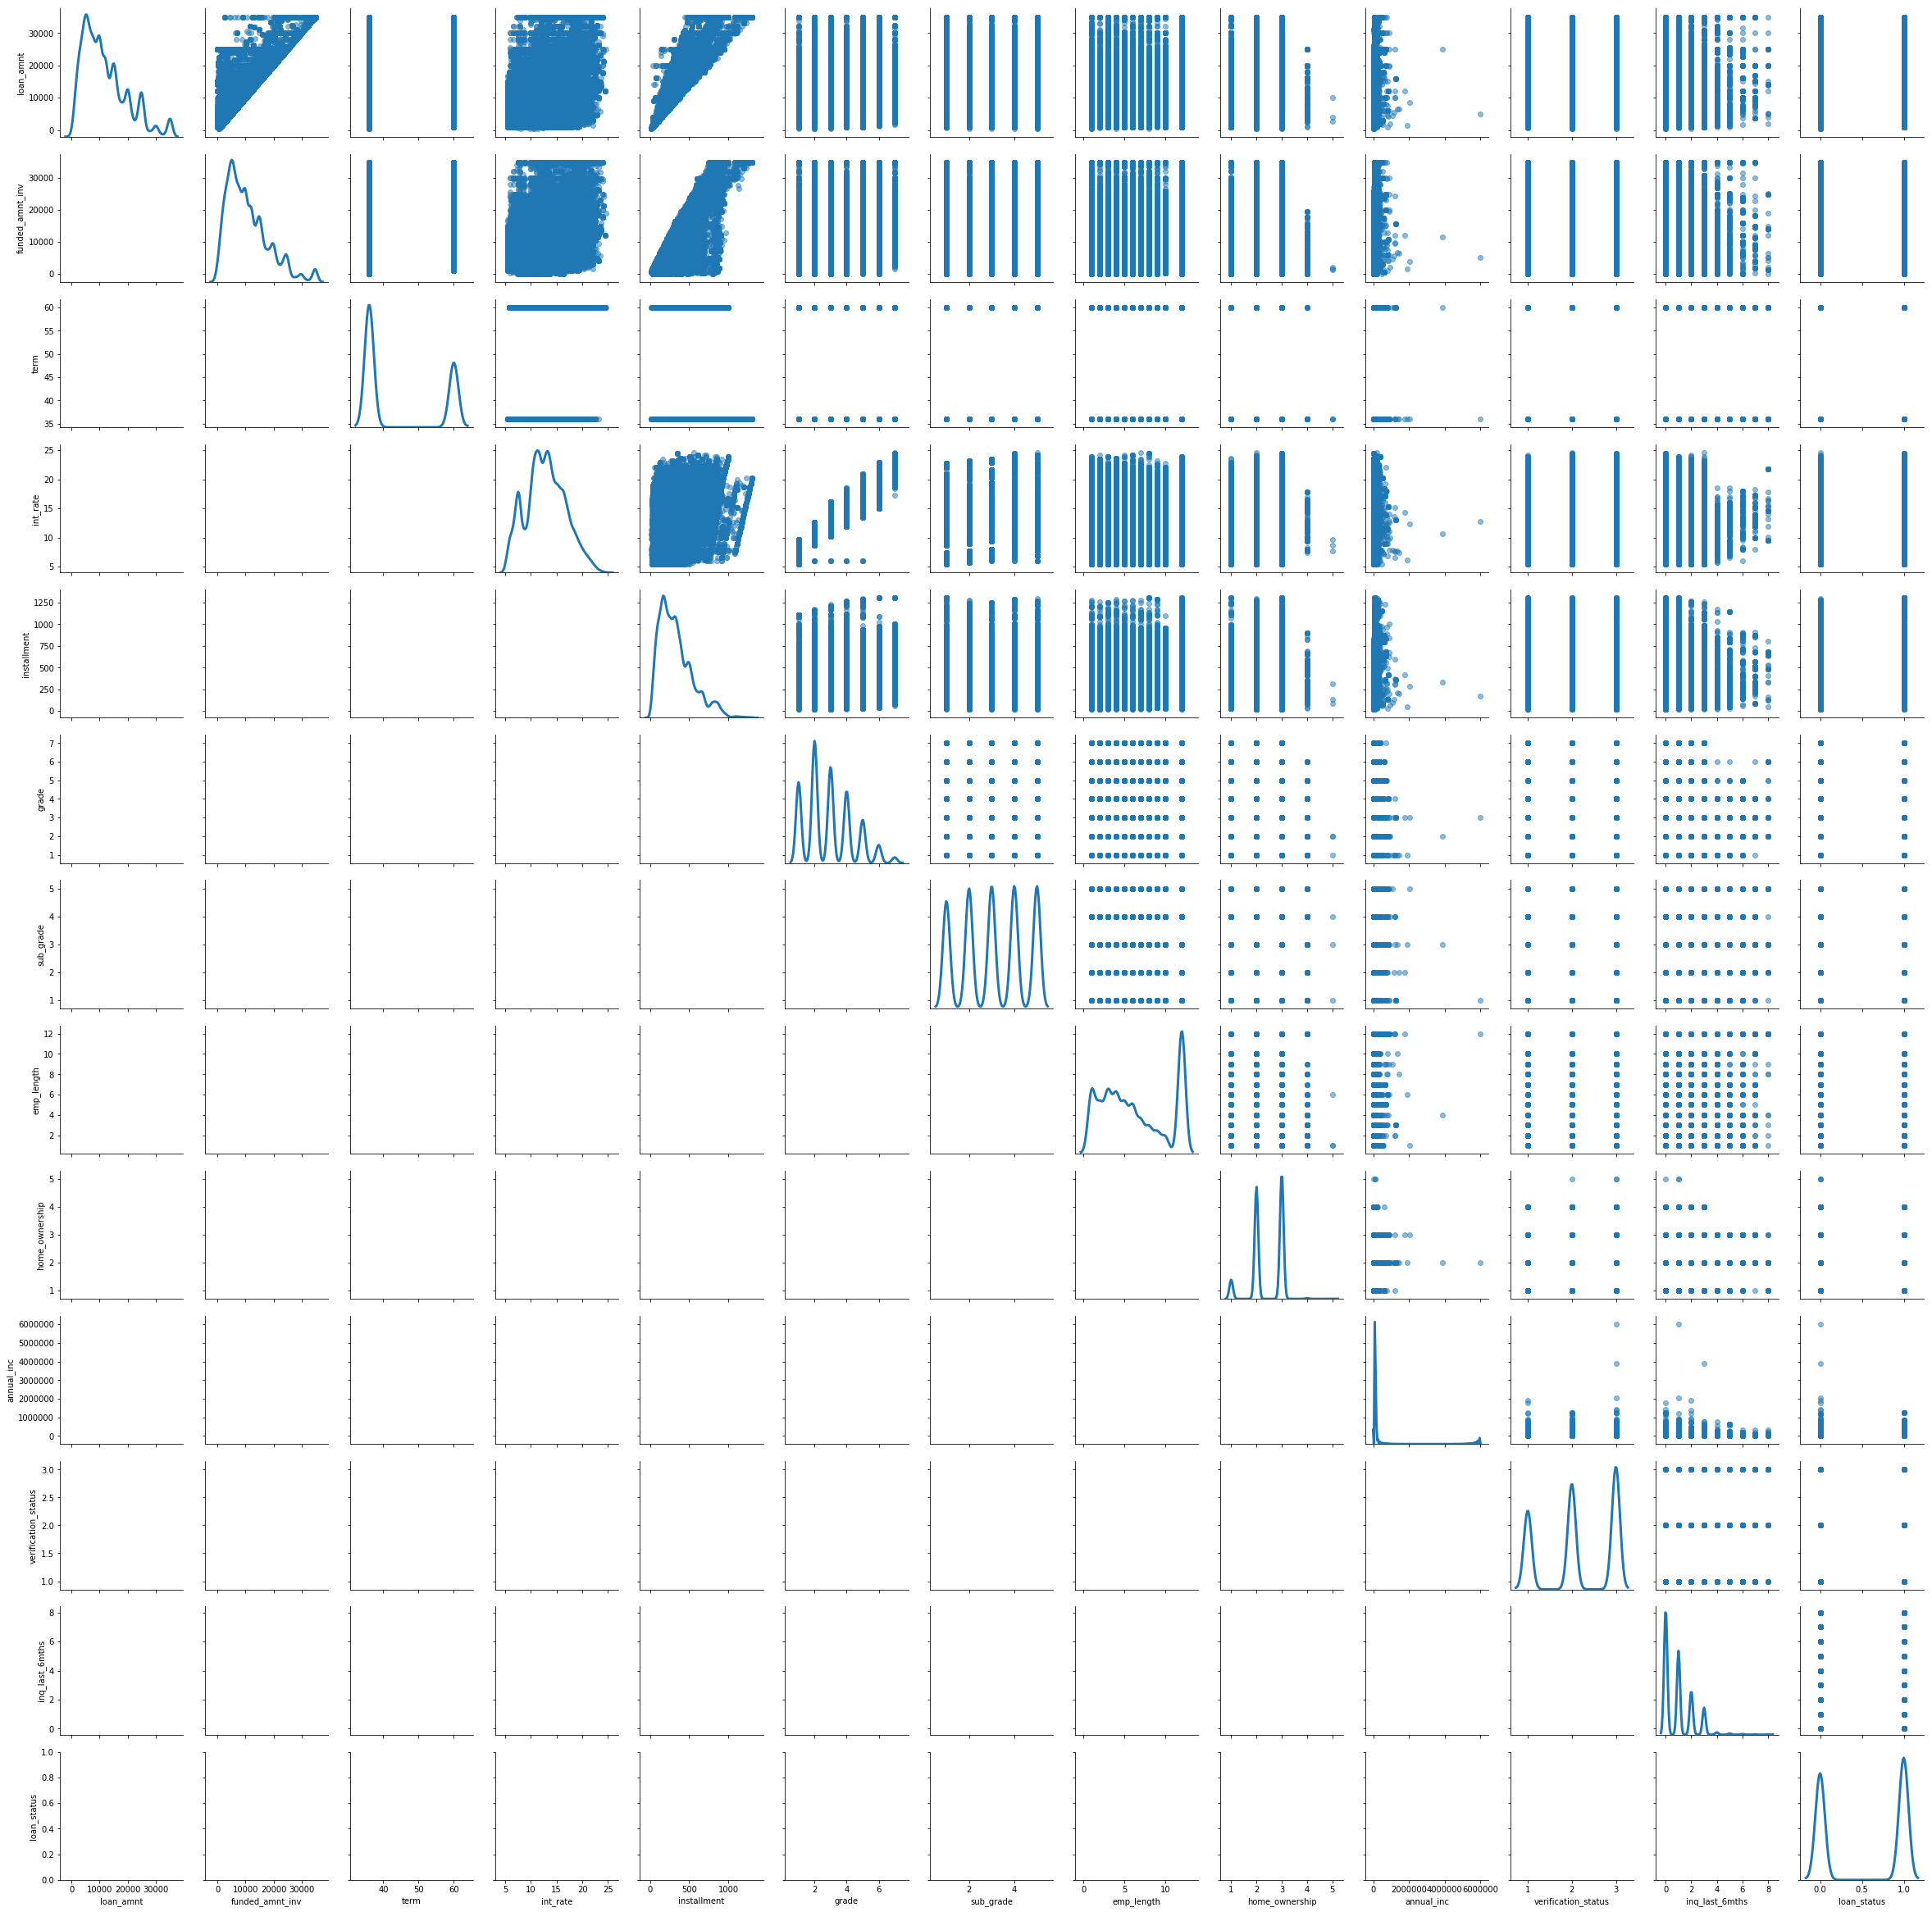

In [14]:
# making scatter plots
graph = sns.PairGrid(X, diag_sharey=False)
# upper right scatter plots
graph.map_upper(plt.scatter, alpha=0.5)
# lower left linear regression fit plots
#graph.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# diagonal variables' univariate distributions
graph.map_diag(sns.kdeplot, lw=3)
plt.show()

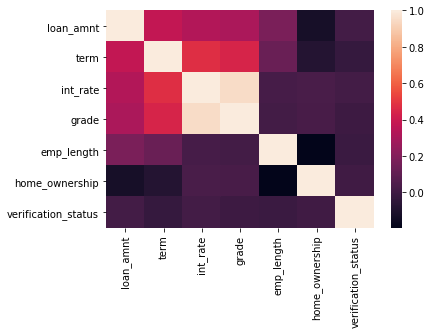

In [17]:
# feature engineering
features = pd.DataFrame()
features['loan_amnt'] = X['loan_amnt']
features['term'] = X['term']
features['int_rate'] = X['int_rate']
features['grade'] = X['grade']
features['emp_length'] = X['emp_length']
features['home_ownership'] = X['home_ownership']
features['verification_status'] = X['verification_status']
# coorelation matrix
corr = features.corr()
sns.heatmap(corr)
plt.show()

## building models

In [ ]:
# target data
Y = pd.DataFrame()
Y['loan_status'] = X['loan_status']

X = X.drop(['loan_status'], axis=1)

In [28]:
# build train & test dataset
trainSize = int(0.65*(X.shape[0]))
X_train, X_test = train_test_dataset(X, trainSize, 1574)
Y_train, Y_test = train_test_dataset(Y, trainSize, 2916)

In [29]:
# use Random Forest model
rfc = ensemble.RandomForestClassifier()

X = pd.get_dummies(X)
rfc.fit(X, Y)
print('Train Dataset score {}'.format(rfc.score(X_train, Y_train)))
print('Test Dataset score {}'.format(rfc.score(X_test, Y_test)))
cross_val_score(rfc, X_train, Y_train, cv=4)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Train Dataset score 0.5056062790325164
Test Dataset score 0.5044419527341728


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y wa

array([0.50800769, 0.49335255, 0.50648727, 0.49823774])

In [30]:
out_mat = confusion_matrix(Y_train, rfc.predict(X_train))
print(out_mat)
print('accuracy = {}'.format((out_mat[0, 0] / (out_mat[0, 0] + out_mat[0, 1]))))
print('typeI error = {}'.format((out_mat[0, 1] / (out_mat[0, 0] + out_mat[0, 1]))))
print('typeII error = {}'.format((out_mat[1, 0] / (out_mat[1, 0] + out_mat[1, 1]))))
print('specificity = {}'.format((out_mat[1, 1] / (out_mat[1, 0] + out_mat[1, 1]))))

[[5496 6141]
 [6205 7130]]
accuracy = 0.4722866718226347
typeI error = 0.5277133281773653
typeII error = 0.46531683539557556
specificity = 0.5346831646044244


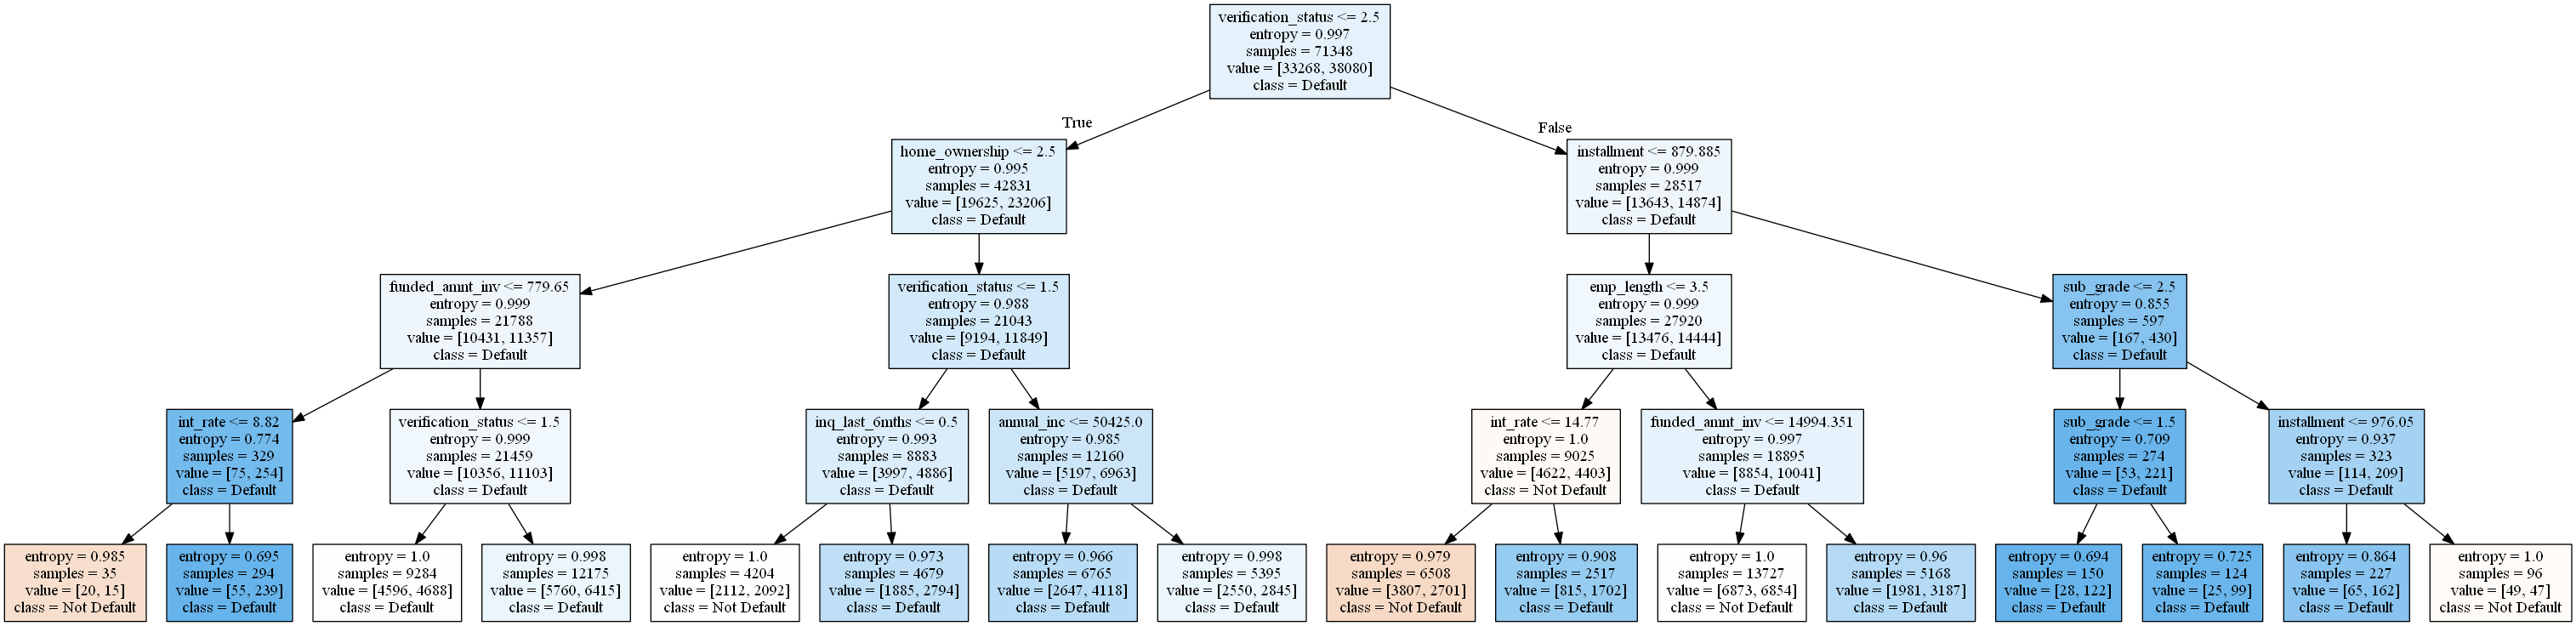

In [31]:
# use decision tree model
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 2039
)
decision_tree.fit(X, Y)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X_train.columns,
    class_names=['Not Default', 'Default'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [32]:
print('Train dataset decision tree score = {}'.format(decision_tree.score(X_train, Y_train)))
print('Test dataset decision tree score = {}'.format(decision_tree.score(X_test, Y_test)))

Train dataset decision tree score = 0.5068877142399487
Test dataset decision tree score = 0.5081938933931344


In [33]:
cross_val_score(decision_tree, X_train, Y_train, cv=5)

array([0.53593594, 0.52192192, 0.53243893, 0.53364037, 0.53344013])

In [34]:
out_mat = confusion_matrix(Y_train, decision_tree.predict(X_train))
print(out_mat)
print('accuracy = {}'.format((out_mat[0, 0] / (out_mat[0, 0] + out_mat[0, 1]))))
print('typeI error = {}'.format((out_mat[0, 1] / (out_mat[0, 0] + out_mat[0, 1]))))
print('typeII error = {}'.format((out_mat[1, 0] / (out_mat[1, 0] + out_mat[1, 1]))))
print('specificity = {}'.format((out_mat[1, 1] / (out_mat[1, 0] + out_mat[1, 1]))))

[[3962 7675]
 [4639 8696]]
accuracy = 0.34046575577898086
typeI error = 0.6595342442210191
typeII error = 0.34788151481064866
specificity = 0.6521184851893513


Weak model 0 R^2 score 0.5052058305301939 for train
Weak model 0 R^2 score 0.5085820251854407 for test
Weak model 20 R^2 score 0.46600192215281117 for train
Weak model 20 R^2 score 0.4664265999654994 for test
Weak model 40 R^2 score 0.46600192215281117 for train
Weak model 40 R^2 score 0.4664265999654994 for test
Weak model 60 R^2 score 0.46600192215281117 for train
Weak model 60 R^2 score 0.4664265999654994 for test
Weak model 80 R^2 score 0.46600192215281117 for train
Weak model 80 R^2 score 0.4664265999654994 for test
Weak model 100 R^2 score 0.46600192215281117 for train
Weak model 100 R^2 score 0.4664265999654994 for test


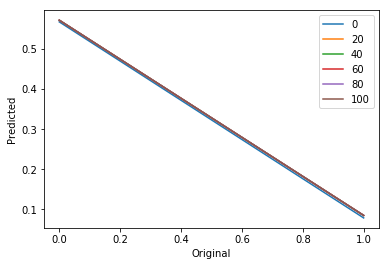

Overall R^2:
[[ 1.        -0.6025279]
 [-0.6025279  1.       ]]


In [35]:
# use gradient boosting classifier model
predicts = pd.DataFrame()
labels = []

uniquex = Y['loan_status'].unique()

# Iterate through decision trees, each time using the residuals
# from the previous tree as the inputs.
for m in range(0, 101):     
    
    dec_tree = tree.DecisionTreeClassifier(max_depth=3)
    dec_tree.fit(X, Y)
    
    # retrieve and store predicted values
    pred = dec_tree.predict(X)
    predicts['pred{}'.format(m)] = pred
    
    # Residues
    predict_df = pd.DataFrame()
    predict_df['loan_status'] = pred
    Y = Y - predict_df
    
#    Print out every 5 iterations
    if m%20 == 0:
        print('Weak model {} R^2 score {} for train'.format(m, dec_tree.score(X_train, Y_train)))
        print('Weak model {} R^2 score {} for test'.format(m, dec_tree.score(X_test, Y_test)))
        labels = labels + [m]
        bestpred = predicts.sum(axis=1)
        plt.plot(uniquex, np.poly1d(np.polyfit(Y['loan_status'], bestpred, 1))(uniquex))
    
plt.legend(labels)
plt.xlabel('Original')
plt.ylabel('Predicted')
plt.show()
predicts = predicts.sum(axis=1)

print('Overall R^2:')
print(np.corrcoef(Y['loan_status'], predicts))

In [36]:
print('Train dataset boosting classifier score = {}'.format(dec_tree.score(X_train, Y_train)))
print('Test dataset boosting classifier score = {}'.format(dec_tree.score(X_test, Y_test)))

0.46600192215281117

In [37]:
cross_val_score(dec_tree, X_train, Y_train, cv=5)

array([0.53673674, 0.53093093, 0.53263917, 0.53504205, 0.53263917])

In [42]:
#out_mat1 = confusion_matrix(Y_train, dec_tree.predict(X_train))
print(out_mat1)
print('accuracy = {}'.format((out_mat1[0, 0] / (out_mat1[0, 0] + out_mat1[0, 1]))))
print('typeI error = {}'.format((out_mat1[0, 1] / (out_mat1[0, 0] + out_mat1[0, 1]))))
print('typeII error = {}'.format((out_mat1[1, 0] / (out_mat1[1, 0] + out_mat1[1, 1]))))
print('specificity = {}'.format((out_mat1[1, 1] / (out_mat1[1, 0] + out_mat1[1, 1]))))

[[10112  1525]
 [ 5012 13335]]
accuracy = 0.8689524791612959
typeI error = 0.13104752083870413
typeII error = 0.27317817626859975
specificity = 0.7268218237314003
